In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt
from functions import *
import nltk
from nltk.corpus import gutenberg, stopwords
from nltk.collocations import *
from nltk import FreqDist
from nltk import word_tokenize
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('/Users/kevinmacmat/Desktop/mod_4_nlp_project/reviews_dataframe')

### Clean the texts

In [3]:
# Removes punctuation, numbers, and makes text lower case
cleanText(df, 'reviews')

In [15]:
df

,reviews,sentiment
0,working with one of the best shakespeare sourc...,0
1,welltremors i the original started off in and...,0
2,ouch this one was a bit painful to sit through...,0
3,ive seen some crappy movies in my life but thi...,0
4,carriers follows the exploits of two guys and ...,0
...,...,...
24995,about a year ago i finally gave up on american...,1
24996,when i saw the elaborate dvd box for this and ...,1
24997,last november i had a chance to see this film ...,1
24998,great movie i loved it great editing and use o...,1


### Create positive and negative dataframes

In [4]:
df_negative = df[:12499]

In [5]:
df_positive = df[12500:]

### Instantiate the count vectorizer

In [6]:
# Build the vectorizer, specify max features 
vect = CountVectorizer(stop_words = ENGLISH_STOP_WORDS, min_df = 10)
# can add in ngram_range=(1,2) for uni/bigram analysis, max_df = 200 (limits size of vocab to which occurs in 
# no more than 200 docs), min_df = 50 (limit size of vocab to ignore terms which occur in less than 50 docs)

### Get a sorted dictionary of word counts for full df

In [7]:
vect_fit = vect.fit_transform(df['reviews'])
word_list = vect.get_feature_names()
count_list = vect_fit.toarray().sum(axis=0)
count_dict = dict(zip(word_list, count_list))
sort_vocab = sorted(count_dict.items(), key=lambda x: x[1], reverse=True)

In [8]:
sort_vocab[:20]

[('movie', 42673),
 ('film', 38260),
 ('like', 19679),
 ('just', 17639),
 ('good', 14711),
 ('time', 12136),
 ('really', 11695),
 ('story', 11677),
 ('bad', 9063),
 ('people', 9039),
 ('great', 8955),
 ('dont', 8506),
 ('movies', 7922),
 ('way', 7876),
 ('films', 7847),
 ('make', 7740),
 ('characters', 7403),
 ('think', 7258),
 ('watch', 6883),
 ('seen', 6641)]

### Get a sorted dictionary of word counts for df_negative

In [9]:
neg_vect = CountVectorizer(stop_words = ENGLISH_STOP_WORDS, min_df = 10)
neg_vect_fit = neg_vect.fit_transform(df_negative['reviews'])
neg_word_list = neg_vect.get_feature_names()
neg_count_list = neg_vect_fit.toarray().sum(axis=0)
neg_count_dict = dict(zip(neg_word_list, neg_count_list))
neg_sort_vocab = sorted(neg_count_dict.items(), key=lambda x: x[1], reverse=True)

In [10]:
neg_sort_vocab[:20]

[('movie', 24182),
 ('film', 18287),
 ('like', 10929),
 ('just', 10541),
 ('good', 7232),
 ('bad', 7216),
 ('really', 6231),
 ('time', 5959),
 ('dont', 5181),
 ('story', 5073),
 ('people', 4685),
 ('make', 4555),
 ('movies', 4201),
 ('plot', 4023),
 ('acting', 3979),
 ('way', 3902),
 ('characters', 3741),
 ('think', 3626),
 ('films', 3521),
 ('watch', 3512)]

### Get a sorted dictionary of word counts for df_positive

In [11]:
pos_vect = CountVectorizer(stop_words = ENGLISH_STOP_WORDS, min_df = 10)
pos_vect_fit = pos_vect.fit_transform(df_positive['reviews'])
pos_word_list = pos_vect.get_feature_names()
pos_count_list = pos_vect_fit.toarray().sum(axis=0)
pos_count_dict = dict(zip(pos_word_list, pos_count_list))
pos_sort_vocab = sorted(pos_count_dict.items(), key=lambda x: x[1], reverse=True)

In [12]:
pos_sort_vocab[:20]

[('film', 19973),
 ('movie', 18490),
 ('like', 8750),
 ('good', 7479),
 ('just', 7098),
 ('story', 6603),
 ('great', 6334),
 ('time', 6177),
 ('really', 5464),
 ('people', 4354),
 ('films', 4326),
 ('best', 4255),
 ('love', 4194),
 ('way', 3974),
 ('life', 3908),
 ('movies', 3720),
 ('characters', 3662),
 ('think', 3632),
 ('seen', 3396),
 ('watch', 3371)]

---

In [19]:
# Create column of each review's length
df['length'] = [len(x) for x in df['reviews']]

In [25]:
# Maximum Review Length
df.length.max()

13291

In [52]:
# Average Review Length
df.length.values.mean()

1260.45028

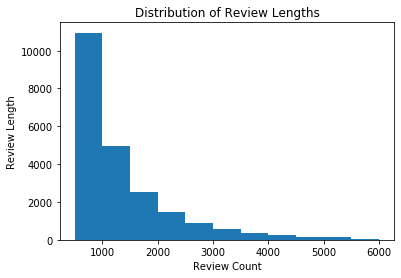

In [48]:
plt.hist(df.length.values, bins=[500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000])
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Count')
plt.ylabel('Review Length')
plt.show()

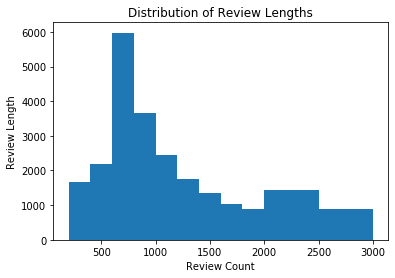

In [50]:
plt.hist(df.length.values, bins=[200,400,600,800,1000,1200,1400,1600,1800,2000,2500,3000])
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Count')
plt.ylabel('Review Length')
plt.show()

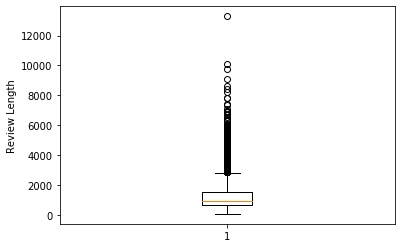

In [51]:
plt.boxplot(df.length.values)
plt.ylabel('Review Length')
plt.show()